# Abgabe 3: Schwingungen

**Teammitglieder:** René Zarwel, Matthias Kastenmüller

<br>

Importieren allgemein benötigter Bibliotheken:

In [1]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import pylab as pylab
import numpy.polynomial.polynomial as poly
import numpy as np
from scipy.integrate import odeint
import math
from numpy import array, polyval, polyfit
import vpython as vp         # get VPython modules for animation
vec=vp.vector

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Aufgabe 1: Gedämpfte Schwingungen

Bei einer harmonischen Schwingung wirkt lediglich die rücktreibende Kraft. Daraus ergibt sich folgenden Schwingungsgleichung:

$$
F = -k \cdot x \quad \text{mit} \quad k=\text{Federkonstante} \\
\omega_0 = \sqrt{\frac{k}{m}}  \quad \text{- Ungedämpfte Eigenkreisfrequenz } \\
\ddot{x} + \omega_0^2 \cdot x = 0
$$

Bei der gedämpften Schwingung wirk zusätzlich zur rücktreibenden Kraft noch eine Reibungskraft $F_R$. So wird die Schwingungsgleichung folgendermaßen erweitert:

$$
F_R = - c \cdot v^n \quad\text{mit}\quad c=\text{Dämpfungskonstante} \quad\text{und}\quad n=\{0,\frac{1}{2}, 1, 2\} \\
\gamma = \frac{c}{2 \cdot m} \quad \text{- Abklingkonstante} \\
\ddot{x} + 2 \cdot \gamma \cdot \dot{x} + \omega_0^2 \cdot x = 0
$$

Beim klassischen Ansatz zur Lösung dieser linearen homogenen Differentialgleichung hilft folgender Ansatz:

$$
x(t) = e^{\lambda \cdot t} \\
(\lambda^2 + 2 \cdot \gamma \cdot \lambda + \omega_0^2) \cdot e^{\lambda \cdot t} = 0
$$

Der Ausdruck in der Klammer ist die charakteristische Gleichung zu Bestimmung von $\lambda$, wobei dieser Paramter durchaus komplex sein kann. Da dies eine quadratische Gleichung ist, muss eine Fallunterscheidung für die Diskriminate $\gamma^2 - \omega_0^2$ erfolgen:

$$
\lambda_{1/2} = - \gamma \pm \sqrt{\gamma^2 - \omega_0^2}
$$


$$
\text{Schwingfall: } \quad \gamma < \omega_0 \\ 
\text{mit} \quad x(t) = e^{-\gamma \cdot t}(A \cdot \cos(\omega \cdot t) + B \cdot \sin(\omega \cdot t))
$$


$$
\text{Aperiodischer Grenzfall: } \quad \gamma = \omega_0 \\
\text{mit} \quad x(t) = c_1 \cdot e^{\lambda \cdot t} + c_2 \cdot e^{\lambda \cdot t}
$$


$$
\text{Kriechfall: } \quad \gamma > \omega_0 \\
\text{mit} \quad x(t) = c_1 \cdot e^{\lambda_1 \cdot t} + c_2 \cdot e^{\lambda_2 \cdot t}
$$

Mittels der Anfangswerte $x(0) = x_0$ und $v_0 = 0$ können folgende allgemeine Gleichung für die 3 Fälle aufgestellt werden:

$$
\text{Schwingfall: } \\
x(t) = x_0 \cdot e^{-\gamma \cdot t} \cos(\omega_d \cdot t) \\ 
\text{mit} \quad  \omega_d = \sqrt{\omega_0^2 - \gamma^2} \quad \text{und} \quad \phi_0 = 0
$$


$$
\text{Aperiodischer Grenzfall: }\\
x(t) = ( x_0 + \gamma \cdot x_0 \cdot t ) \cdot e^{-\gamma \cdot t} 
$$


$$
\text{Kriechfall: }\\
x(t) = x_0 \cdot \frac{1}{2 \cdot \lambda}((\lambda + \gamma) \cdot e^{\lambda \cdot t} + (\lambda - \gamma) \cdot e^{-\lambda \cdot t} ) \cdot e^{-\gamma \cdot t} \\
\text{mit} \quad \lambda = \sqrt{\gamma^2 - \omega_0^2} 
$$

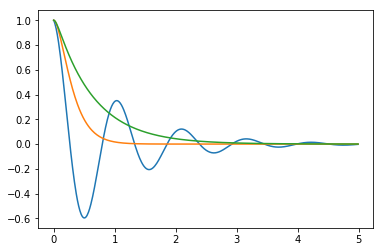

In [15]:
from math import exp as e

def swing(t):
    if(gamma < omega0):      #Schwingfall
        w = math.sqrt(omega0**2 - gamma**2)
        return x0 * e(-gamma * t) * math.cos(w*t)
    elif(gamma == omega0):   #Aperiodischer Grenzfall
        return (x0 + gamma*x0*t)*e(-gamma * t)
    else:                    #Kriechfall
        l = math.sqrt(gamma**2 - omega0**2)
        return x0 * 1/(2*l) *((l+gamma)*e(l * t) + (l-gamma)*e(-l * t))*e(-gamma * t)

r = np.arange(0, 5, 0.01)


x0 = 1
omega0 = 6
gamma = 1
n = 1
plt.plot(r,[swing(x) for x in r])
    
x0 = 1
omega0 = 6
gamma = 6
n = 1
plt.plot(r,[swing(x) for x in r])

x0 = 1
omega0 = 6
gamma = 12
n = 1
plt.plot(r,[swing(x) for x in r])
    

## Aufgabe 2: Das nichtlineare Pendel I

## Aufgabe 3: Erzwungene Schwingung

## Aufgabe 4: Das nichtlineare Pendel II